In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../../data/Mexico/processed_data/Veracruz_2016-2018.csv", index_col=0)
data["Cases"]

Date
02/01/2016     0
09/01/2016     0
16/01/2016     0
23/01/2016     0
30/01/2016     1
06/02/2016     0
13/02/2016     0
20/02/2016     0
27/02/2016     0
05/03/2016     0
12/03/2016     0
19/03/2016     1
26/03/2016     0
02/04/2016     2
09/04/2016     0
16/04/2016     1
23/04/2016     0
30/04/2016     0
07/05/2016     2
14/05/2016     1
21/05/2016     0
28/05/2016     0
04/06/2016     0
11/06/2016     3
18/06/2016     1
25/06/2016     1
02/07/2016     9
09/07/2016    15
16/07/2016    18
23/07/2016    43
              ..
14/10/2017    15
21/10/2017     1
28/10/2017    21
04/11/2017     5
11/11/2017     8
18/11/2017     3
25/11/2017     5
02/12/2017     3
09/12/2017     5
16/12/2017     3
23/12/2017     3
30/12/2017     0
06/01/2018     0
13/01/2018     0
20/01/2018     0
27/01/2018     0
03/02/2018     0
10/02/2018     0
17/02/2018     0
24/02/2018     0
03/03/2018     0
10/03/2018     0
17/03/2018     1
24/03/2018     0
31/03/2018     0
07/04/2018     0
14/04/2018     0
21/04/201

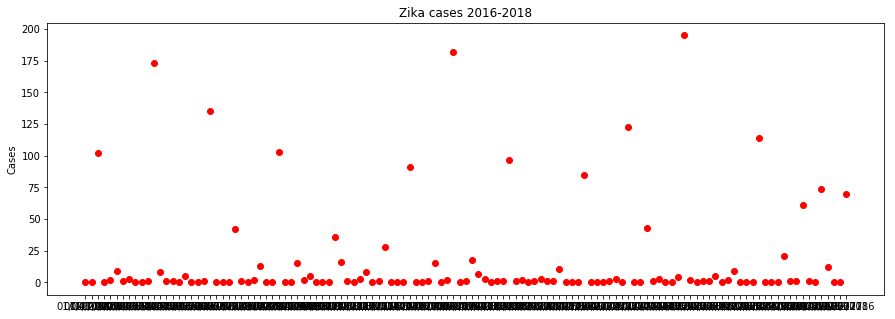

In [6]:
plt.clf()
plt.figure(figsize=(15,5))
plt.plot(data['Cases'], "ro")
plt.ylabel('Cases')
plt.title('Zika cases 2016-2018')
plt.plot();

In [13]:
model = pf.ARIMAX(data=data, formula='Cases~Searches',
                  ar=4, ma=4, integ=2, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(4,2,4)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced Differenced Cases       Method: MLE                                       
Start Date: 30/01/2016                                  Log Likelihood: -521.5965                         
End Date: 05/05/2018                                    AIC: 1065.1929                                    
Number of observations: 117                             BIC: 1095.5768                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    -0.5964    0.0992     -6.0105  0.0      (-0.7909 | -0.4019)      
AR(2)                                

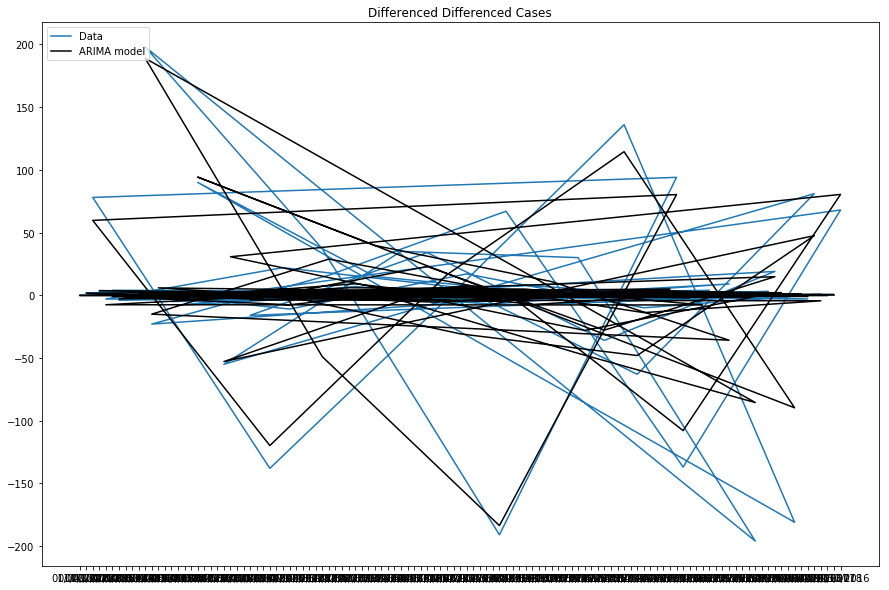

In [14]:
plt.clf()
model.plot_fit(figsize=(15,10))